<a href="https://colab.research.google.com/github/deena19liebert/Deep-Learning-Techniques-Lab/blob/main/FaceRecognitionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow opencv-python matplotlib scikit-learn



In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


Images shape: (1560, 62, 47)
Number of classes: 12


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 45, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 45, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 20, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 8, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 8, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 488,460 (1.86 MB)

 Trainable params: 488,012 (1.86 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 763ms/step - accuracy: 0.3006 - loss: 2.4454 - val_accuracy: 0.1763 - val_loss: 2.4785
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 459ms/step - accuracy: 0.5023 - loss: 1.5226 - val_accuracy: 0.0673 - val_loss: 2.4985
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 527ms/step - accuracy: 0.6071 - loss: 1.1773 - val_accuracy: 0.0673 - val_loss: 2.5214
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 399ms/step - accuracy: 0.7389 - loss: 0.8212 - val_accuracy: 0.0385 - val_loss: 2.5462
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 469ms/step - accuracy: 0.7877 - loss: 0.6664 - val_accuracy: 0.0385 - val_loss: 2.5777
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - accuracy: 0.8543 - loss: 0.4660 - val_accuracy: 0.0385 - val_loss: 2.6568
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 444ms/step - accuracy: 0.8844 - loss: 0.3798 - val_accuracy: 0.0385 - val_loss: 2.6962
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.9038 - loss: 0.2883 - val_accur

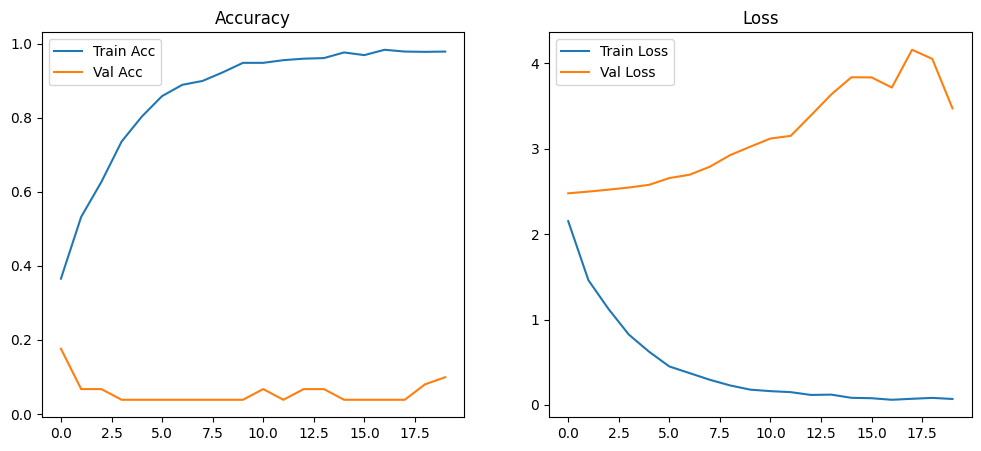

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


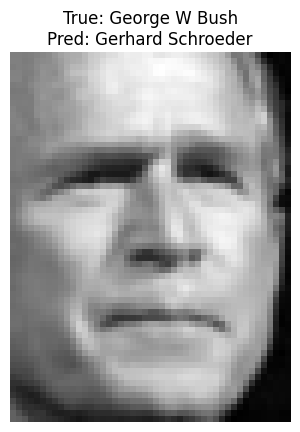

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


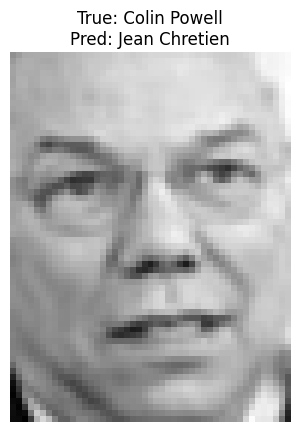

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


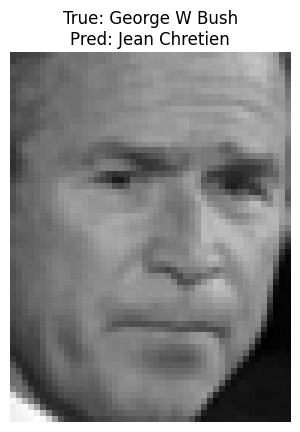

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


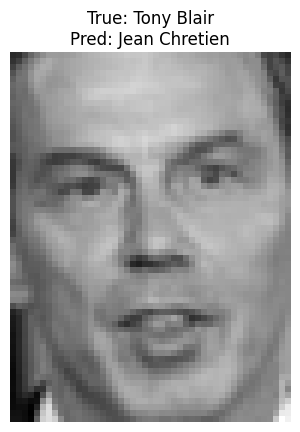

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


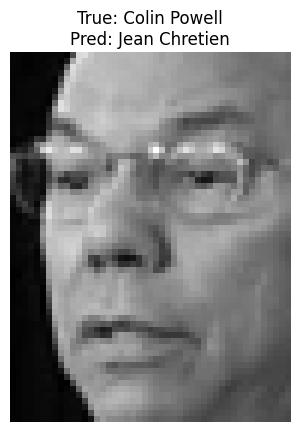

In [ ]:
lfw = fetch_lfw_people(min_faces_per_person=50, resize=0.5)

X = lfw.images
y = lfw.target
target_names = lfw.target_names

print("Images shape:", X.shape)
print("Number of classes:", len(target_names))

X = X.astype('float32') / 255.0

X = np.expand_dims(X, -1)

y_cat = to_categorical(y)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(target_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=64
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

def show_prediction(index):
    image = X_test[index]
    true_label = np.argmax(y_test[index])
    pred_label = np.argmax(model.predict(np.expand_dims(image, axis=0))[0])

    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"True: {target_names[true_label]}\nPred: {target_names[pred_label]}")
    plt.axis('off')
    plt.show()

for i in range(5):
    show_prediction(i)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_face_and_predict(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
        face_img = img[y:y+h, x:x+w]
        face_img_resized = cv2.resize(face_img, (62, 47))  # LFW shape
        face_img_resized = face_img_resized.astype('float32') / 255.0
        face_img_resized = np.expand_dims(face_img_resized, axis=[0, -1])

        pred = model.predict(face_img_resized)
        name = target_names[np.argmax(pred)]

        cv2.rectangle(img, (x, y), (x+w, y+h), 255, 2)
        cv2.putText(img, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, 255, 2)

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title('Detected and Predicted Face')
    plt.show()

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    detect_face_and_predict(fn)
